## Linear regression with multiple variables

Implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.The file ex1data2.txt contains a training set of housing prices in Port-
land, Oregon.

*Note: The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.*

Hypothesis function used:  h<sub>&#952;</sub>(x) = &#952;<sub>0</sub> + &#952;<sub>1</sub>X<sub>1</sub> + &#952;<sub>2</sub>X<sub>2</sub>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('./Files/ex1data2.txt', delimiter=',')

X = data[:,0:2]                  #Feature matrix without X0
Y = (data[:,2]).reshape(47,1)    #The actual price matrix

m = Y.size       #No of training samples
n = X.shape[1]   #No of Features

In [2]:
#Feature Normalization by mean normalization

mean = [] #To store the mean of each feature
STD = []  #To store the STD of each feature

for i in range(n):
    
    mean.append(np.sum(X[:,i],axis=0)/m)
    STD.append(np.std(X[:,i],ddof=1))
    
    #subtracting the mean from each feature respectively
    X[:,i] -= mean[i]
    #Diving each feature with its STD respectively
    X[:,i] /= STD[i]

In [3]:
def CostFn(x,y,Theta):
    h = np.dot(x,Theta)
    J = (1/(2*m))*np.sum(np.square(h-y))
    return J

In [4]:
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1) 

In [5]:
def Gradient_d(x,y,Theta,L):
    
    J_History = []
    iterations = 400
    
    #Applying gradient descent
    for i in range(iterations):
        h = x.dot(Theta)
        J_History.append(CostFn(x,y,Theta))
        Theta = Theta - L*(1/m)*((x.T).dot(h-y))
    return(J_History,Theta)

In [6]:
L = 0.01
theta = np.zeros((3,1))

J,theta = Gradient_d(X,Y,theta,L)
print("Predicted Theta Values:\n",theta) 

Predicted Theta Values:
 [[334302.06399328]
 [100087.11600585]
 [  3673.54845093]]


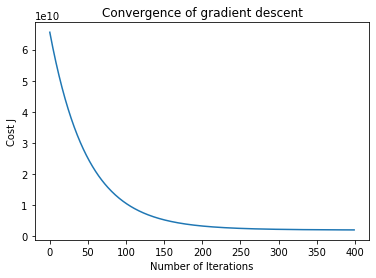

In [7]:
#Visualizing the convergence of gradient descent
plt.title("Convergence of gradient descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost J")
plt.plot(J)
plt.show()

/home/lord_grim/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


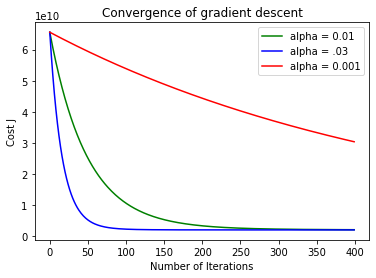

This Shows that 0.03 is a better learning rate


In [8]:
#convergence of gradient descent with different learning rate
#Visualizing the convergence of gradient descent

J1,T1 = Gradient_d(X,Y,np.zeros((3,1)),.03)
J2,T2 = Gradient_d(X,Y,np.zeros((3,1)),0.001)

plt.title("Convergence of gradient descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost J")
plt.plot(J,c='G',label='alpha = 0.01')
plt.plot(J1,c='B',label='alpha = .03')
plt.plot(J2,c='R',label='alpha = 0.001')
plt.legend(loc='upper right')

plt.show()

print("This Shows that 0.03 is a better learning rate")

In [9]:
#predict the price of a house with 1650 square feet and 3 bedrooms.
# predict = np.array([1,(1650-mean[0])/STD[0],(3-mean[1])/STD[1]])
predict = np.array([1,(1650-mean[0])/STD[0],(3-mean[1])/STD[1]])
print("Predicted price of a 1650 sq-ft, 3 br house is:",np.sum(predict.dot(theta)),"\b$")

Predicted price of a 1650 sq-ft, 3 br house is: 289314.6203377763 $
